In [338]:
import numpy as np
import matplotlib.pyplot as plt

# m = """Sabqponm
# abcryxxl
# accszExk
# acctuvwj
# abdefghi"""

with open("2022_12_12_input.txt") as fo:
    m=fo.read()

arr = np.zeros((len(m.split("\n")),len(m.split("\n")[0])))
r,c = arr.shape

alphasub = {l:n for l,n in zip("abcdefghijklmnopqrstuvwxyz",list(range(1,27)))}
alphasub['S'] = 0
alphasub['E'] = 27
row_start = np.array(["S" in line for line in m.split("\n")]).argmax()
col_start = [f.start() for f in re.finditer("S",m.split("\n")[row_start])][0]


row_end = np.array(["E" in line for line in m.split("\n")]).argmax()
col_end = [f.start() for f in re.finditer("E",m.split("\n")[row_end])][0]

for i,char in enumerate(m.replace("\n","")):
   arr[i//c,i%c] = int(alphasub[char])

graph = {}
h,w = arr.shape
r = arr.ravel()
for p in range(len(r)):
    neighbors = []
    if p > 0 and p%w>0:
        if r[p-1]-r[p] <= 1:
            neighbors.append(p-1)
    if p < len(r) and (p+1)%w >0:
        if r[p+1]-r[p] <= 1:
            neighbors.append(p+1)
    if p>=w:
        if r[p-w]-r[p] <= 1:
            neighbors.append(p-w)
    if (p+w)<len(r):
        if r[p+w]-r[p] <= 1:
            neighbors.append(p+w)
    graph[p]=neighbors
start = row_start*w+col_start
end = row_end*w+col_end

In [339]:
start,end

(3460, 3608)

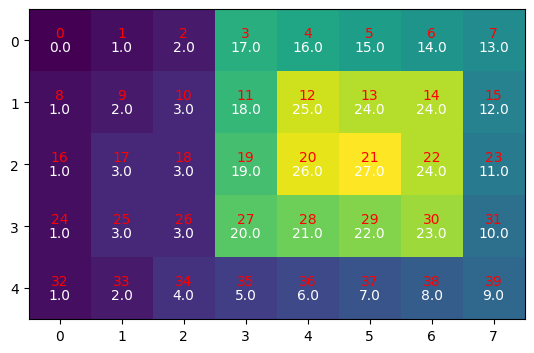

In [234]:
fig, ax = plt.subplots()
ax.imshow(arr)
for i in range(5):
    for j in range(8):
        ax.annotate(arr[i,j],(j,i),va="top",ha="center",color='white')
        ax.annotate(i*w+j,(j,i),va="bottom",ha='center',color='red')

In [287]:
graph = {}
h,w = arr.shape
r = arr.ravel()
for p in range(len(r)):
    neighbors = []
    if p > 0 and p%w>0:
        if r[p-1]-r[p] <= 1:
            neighbors.append(p-1)
    if p < len(r) and (p+1)%w >0:
        if r[p+1]-r[p] <= 1:
            neighbors.append(p+1)
    if p>=w:
        if r[p-w]-r[p] <= 1:
            neighbors.append(p-w)
    if (p+w)<len(r):
        if r[p+w]-r[p] <= 1:
            neighbors.append(p+w)
    graph[p]=neighbors


    
# fig, ax = plt.subplots(figsize=(16,10))
# ax.imshow(arr)
# for i in range(5):
#     for j in range(8):
#         ax.annotate(arr[i,j],(j,i),va="top",ha="left",color='black',fontsize=14)
# for k,v in graph.items():
#     x1,y1 = k%w,k//w
#     for d in v:
#         dx = d%w-x1
#         dy = d//w-y1
#         if dx >= 0:
#             if dy >=0:
#                 color = "red"
#             else:
#                 color="white"
#         elif dy>=0:
#             color = "black"
#         else:
#             color="yellow"
#         ax.arrow(x1,y1,dx,dy,color=color,head_width=.1)

In [47]:
[(i,j) for i in cols for j in rows]


[(-1, -1), (-1, 0), (-1, 1), (0, -1), (0, 0), (0, 1), (1, -1), (1, 0), (1, 1)]

In [340]:
def dfs_all_paths(graph, start, end, path=None):
    if path is None:
        path = []
    
    path = path + [start]
    if start == end:
        return [path]
    
    if start not in graph:
        return []

    paths = []
    for neighbor in graph[start]:
        if neighbor not in path:
            new_paths = dfs_all_paths(graph, neighbor, end, path.copy())
            for new_path in new_paths:
                paths.append(new_path)
    
    return paths
row_start = np.array(["S" in line for line in m.split("\n")]).argmax()


paths = dfs_all_paths(graph, start, end)

KeyboardInterrupt: 

In [341]:

def dfs_shortest_path(graph, start, end, path=None):
    if path is None:
        path = []
    
    path = path + [start]
    if start == end:
        return [path]
    
    if start not in graph:
        return []

    shortest_path = None
    for neighbor in graph[start]:
        if neighbor not in path:
            new_path = dfs_shortest_path(graph, neighbor, end, path.copy())
            if new_path:
                if shortest_path is None or len(new_path) < len(shortest_path):
                    shortest_path = new_path
    
    return shortest_path


In [342]:
paths = dfs_shortest_path(graph, start, end)

KeyboardInterrupt: 

In [ ]:
p = np.array([len(p) for p in paths])
p.argmin()

In [ ]:
len(paths[8])

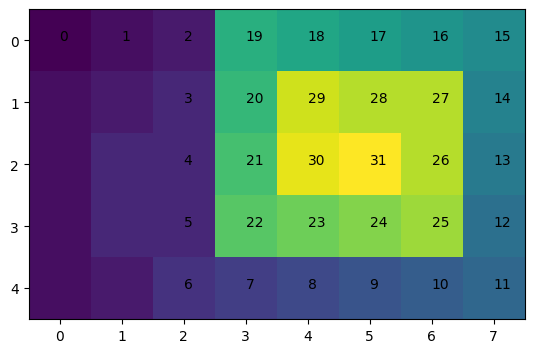

In [280]:
fig, ax = plt.subplots()
ax.imshow(arr)
for i,p in enumerate(paths[8]):
    ax.annotate(i,(p%w,p//w))
    

In [282]:
with open("2022_12_12_input.txt") as fo:
    m=fo.read()

In [192]:
start_node = 0
end_node = 22

result_dfs_all_paths = 
print(result_dfs_all_paths)

[]


In [285]:
"E" in m

True

20

In [300]:
line

'SbccccccaaaaaccccccccaaccccaaaccccccccccccccaaaaaaaaaaaaaacccccccaaaaaaccccccaaaaaccccccccacccaaaccaaacccccccccaaacaaccaaaaaaaaaaaaaaaaaiiinnntttxxxEzzzzyyyvvqqqmmmeeecccccc'